**Name:** Raiken Lee D. Ladrera &emsp; **Program & Year:** BSCS - 1

---
---

Given the following graph, implement the algorithm in Python.

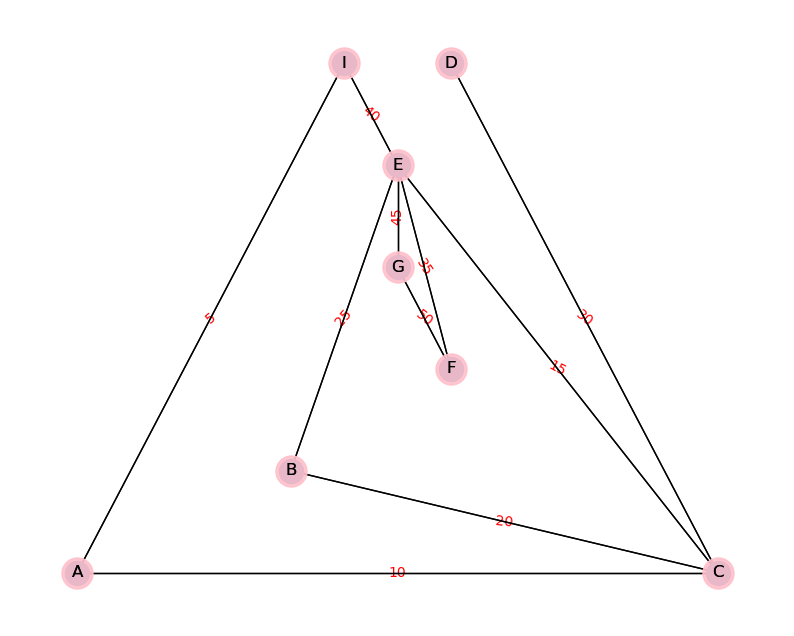

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgeList = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgeList)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)
plt.show()

---

# $\textbf{Kruskal's Algorithm}$

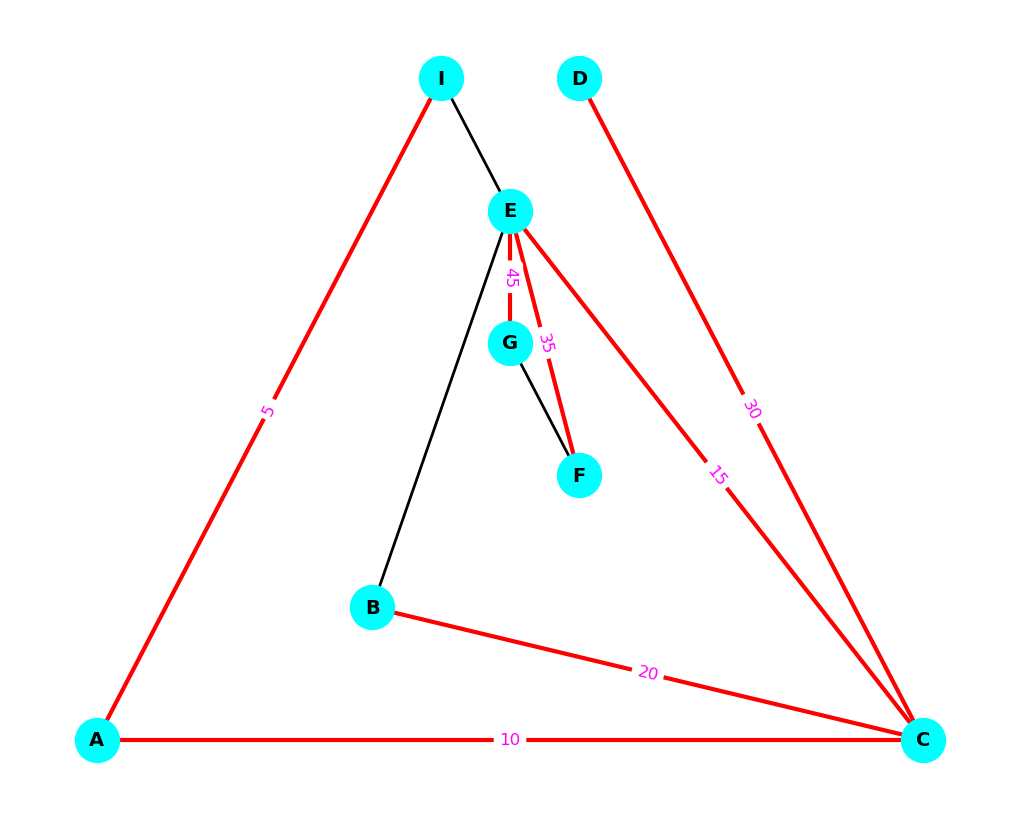

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def Kruskal(G):
    mst = nx.Graph()
    sortedEdges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    disjointSet = {node: {node} for node in G.nodes()}
    
    for i, j, data in sortedEdges:
        if find(disjointSet, i) != find(disjointSet, j):
            mst.add_edge(i, j, **data)
            union(disjointSet, i, j)
    
    return mst

def find(disjointSet, node):
    return next(iter([k for k, j in disjointSet.items() if node in j]))

def union(disjointSet, i, j):
    i = find(disjointSet, i)
    j = find(disjointSet, j)
    if i != j:
        disjointSet[i].update(disjointSet[j])
        del disjointSet[j]

G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
edgeList = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), 
            ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)
            ]
G.add_weighted_edges_from(edgeList)
mst = Kruskal(G)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='cyan', font_size=14, font_weight='bold', edge_color='black', width=2)
nx.draw_networkx_edges(mst, pos=pos, edge_color='red', width=3)
mst_edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos=pos, edge_labels=mst_edge_labels, font_color='magenta', font_size=12)
plt.show()


### $\textbf{Solution:}$

| Iteration Number | Edge Considered | Weight | Action Taken |
| :-: | :-: | :-: | :-: |
| $1$ | $(A, I)$ | 5 | added |
| $2$ | $(A, C)$ | 10 | added |
| $3$ | $(C, E)$ | 15 | added |
| $4$ | $(B, C)$ | 20 | added |
| $5$ | $(B, E)$ | 25 | not added |
| $6$ | $(C, D)$ | 30 | added |
| $7$ | $(E, F)$ | 35 | added |
| $8$ | $(E, I)$ | 40 | not added |
| $9$ | $(E, G)$ | 45 | added |
| $10$ | $(F, G)$ | 50 | not added |

---

# $\textbf{Prim's Algorithm}$

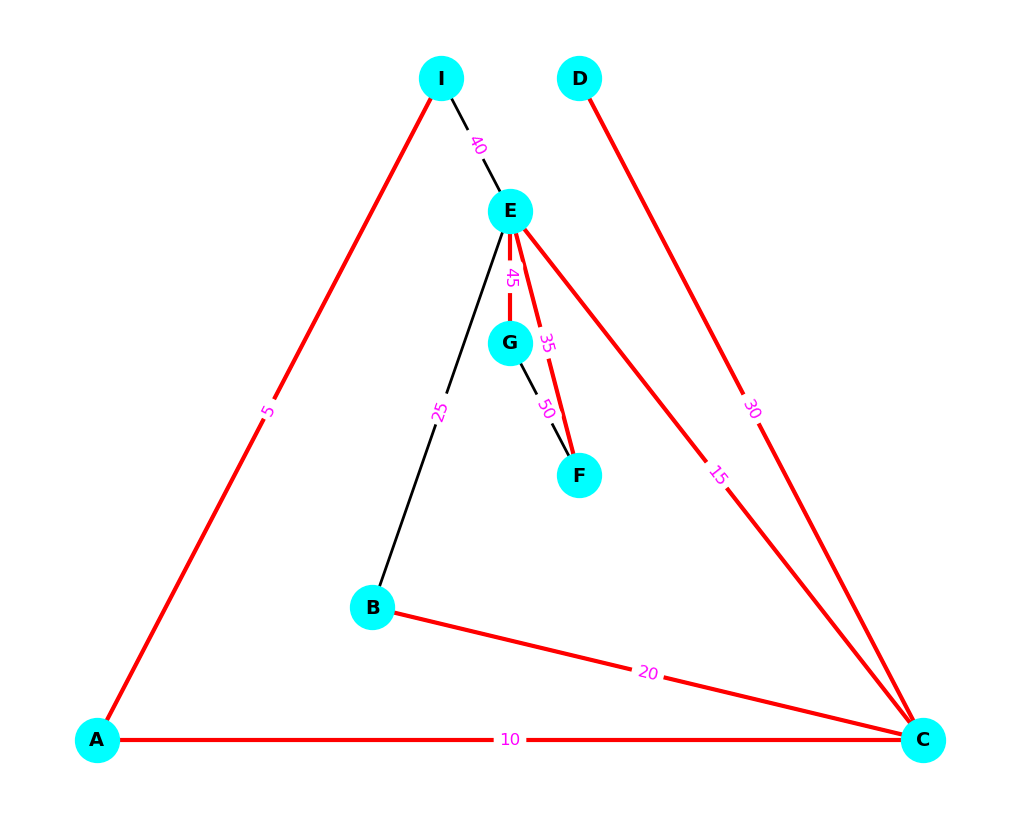

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

def Prim(graph):
    mst = nx.Graph()
    visited = set()
    startingNode = list(graph.nodes())[0]
    visited.add(startingNode)
    
    while len(visited) < len(graph.nodes()):
        min_weight = float('inf')
        min_edge = None
        
        for node in visited:
            for neighbor, data in graph[node].items():
                if neighbor not in visited and data['weight'] < min_weight:
                    min_weight = data['weight']
                    min_edge = (node, neighbor)
        
        i, j = min_edge
        visited.add(j)
        mst.add_edge(i, j, weight=min_weight)
    
    return mst

G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A","B","C","D","E","F","G","I"])
edgeList = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), 
            ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)
            ]
G.add_weighted_edges_from(edgeList)
mst = Prim(G)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='cyan', font_size=14, font_weight='bold', edge_color='black', width=2)
nx.draw_networkx_edges(mst, pos=pos, edge_color='red', width=3)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='magenta', font_size=12)
plt.show()


### $\textbf{Solution:}$

| Iteration Number | Vertex Added | Edge Added | Weight |
| :-: | :-: | :-: | :-: |
| $0$ | $I$ |  |  |
| $1$ | $A$ | $(I, A)$ | 5 |
| $2$ | $C$ | $(A, C)$ | 10 |
| $3$ | $E$ | $(C, E)$ | 15 |
| $4$ | $B$ | $(C, B)$ | 20 |
| $5$ | $D$ | $(C, D)$ | 30 |
| $6$ | $F$ | $(E, F)$ | 35 |
| $7$ | $G$ | $(E, G)$ | 45 |

---

# $\textbf{Djitraka's Shortest Path Algorithm}$

Shortest distances from node A : {'A': 0, 'B': 30, 'C': 10, 'D': 40, 'E': 25, 'F': 60, 'G': 70, 'I': 5}


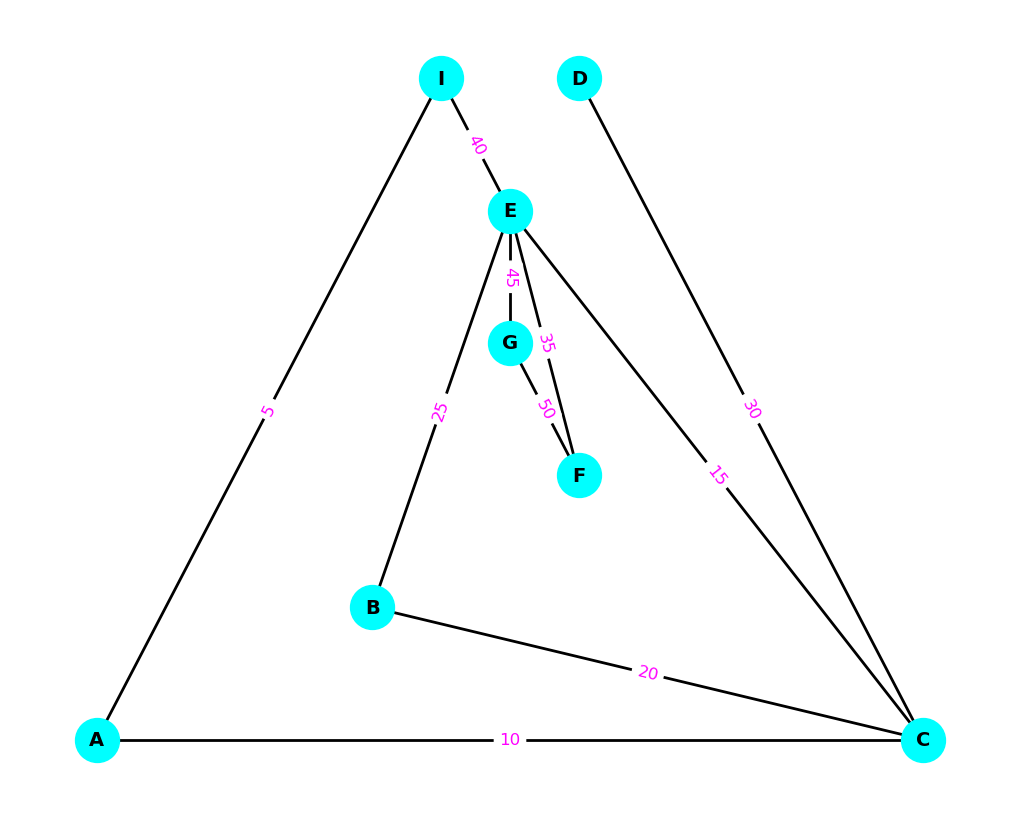

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

def Djitraka(graph, source):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[source] = 0
    
    visited = set()
    
    while len(visited) < len(graph.nodes()):
        min_distance = float('inf')
        min_node = None
        for node in distances:
            if node not in visited and distances[node] < min_distance:
                min_distance = distances[node]
                min_node = node
        visited.add(min_node)
        
        for neighbor, data in graph[min_node].items():
            distance_to_neighbor = distances[min_node] + data['weight']
            if distance_to_neighbor < distances[neighbor]:
                distances[neighbor] = distance_to_neighbor
    
    return distances

G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A","B","C","D","E","F","G","I"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), 
            ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)
            ]
G.add_weighted_edges_from(edgelist)

startingNode = 'A'
distances = Djitraka(G, startingNode)
print("Shortest distances from node", startingNode, ":", distances)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='cyan', font_size=14, font_weight='bold', edge_color='black', width=2)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='magenta', font_size=12)
plt.show()

### $\textbf{Solution:}$

#### $\textbf{Shortest distances from node A : }$

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| $A$ | 0 |
| $B$ | 30 |
| $C$ | 10 |
| $D$ | 40 |
| $E$ | 25 |
| $F$ | 60 |
| $G$ | 70 |
| $I$ | 5 |

#### $\textbf{Shortest distances from node B : }$

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| $A$ | 30 |
| $B$ | 0 |
| $C$ | 20 |
| $D$ | 50 |
| $E$ | 25 |
| $F$ | 60 |
| $G$ | 70 |
| $I$ | 35 |

#### $\textbf{Shortest distances from node C : }$

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| $A$ | 10 |
| $B$ | 20 |
| $C$ | 0 |
| $D$ | 30 |
| $E$ | 15 |
| $F$ | 50 |
| $G$ | 60 |
| $I$ | 15 |

#### $\textbf{ Shortest distances from node D : }$

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| $A$ | 40 |
| $B$ | 50 |
| $C$ | 30 |
| $D$ | 0 |
| $E$ | 45 |
| $F$ | 80 |
| $G$ | 90 |
| $I$ | 45 |

#### $\textbf{ Shortest distances from node E : }$

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| $A$ | 25 |
| $B$ | 25 |
| $C$ | 15 |
| $D$ | 45 |
| $E$ | 0 |
| $F$ | 35 |
| $G$ | 45 |
| $I$ | 30 |

#### $\textbf{ Shortest distances from node F : }$

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| $A$ | 60 |
| $B$ | 60 |
| $C$ | 50 |
| $D$ | 80 |
| $E$ | 35 |
| $F$ | 0 |
| $G$ | 50 |
| $I$ | 65 |

#### $\textbf{ Shortest distances from node G : }$

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| $A$ | 70 |
| $B$ | 70 |
| $C$ | 60 |
| $D$ | 90 |
| $E$ | 45 |
| $F$ | 50 |
| $G$ | 0 |
| $I$ | 75 |

#### $\textbf{ Shortest distances from node I : }$

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| $A$ | 5 |
| $B$ | 35 |
| $C$ | 15 |
| $D$ | 45 |
| $E$ | 30 |
| $F$ | 65 |
| $G$ | 75 |
| $I$ | 0 |
